In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

#This binning with the error calculated in this way is not good if the input data has too few point. 
# For example, if nbins=size(x), error will be 0.
def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    #nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y) [0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)/np.sqrt(n)
    
    return meanx,meany,std_y #putput: nbins rows, 3 col

def log_binning(x,y,nbins):
    nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    max_x = np.log10(max(x))
    min_x = np.log10(min(x))
    bins = np.logspace(min_x,max_x,num=nbins)
    # Based off of: http://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
    bin_no_pts= np.histogram(x, bins)[0] #the no fo data points in every bin
    #print "binning schem:";print bin_no_pts
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / bin_no_pts)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / bin_no_pts)   
    bin_means_yy = (np.histogram(x,bins,weights=y*y)[0] / bin_no_pts)
    bin_std_y = np.sqrt( bin_means_yy - bin_means_y*bin_means_y)/np.sqrt(bin_no_pts)   

    return bin_means_x,bin_means_y,bin_std_y # output: nbins-rows, 3 cols
figsz=(6.5,5) #fig size
legfs=18 #legend fontsize
axfs=16 # axis label fontsize
tickfs=15# ticklabel fontsize
texfs=16 # annotante/tex fontsize
titfs=18# title fontsize


In [15]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [2]:
#1st ZF_1.55-300K
fpath11=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Gd2Zr2O7\GZO_1p55-300K_ZF_globalAlfa_genExpo.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=',')

In [3]:
#1st ZF_1.55-300K
#here input the parameters
#####################
plotNo      =np.array([0,1,3,14]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

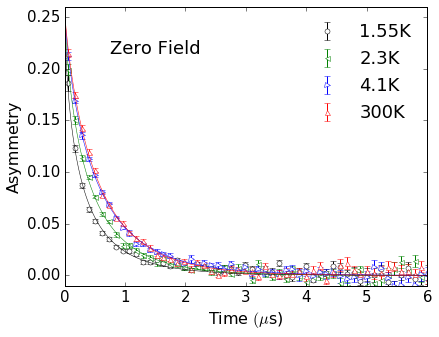

In [20]:
%matplotlib inline
#1st ZF_1.55-300K
#plot data
#here input the parameters
#%matplotlib qt
#####################
plt.figure(figsize=figsz)
fig_label=("1.55K","2.3K","2.9K",'4.1K',"5.2K","7.4K","11K","16K","21K","32K","42K",'50K',"100K","200K","300K")
tex_pos=np.array([0,0.02,0.04,0.06,0.08,0.17])
markers=("o","<",">","^","o","d")
mkfaceCor=("black","green","blue","red","orange")
#####################
for i, ii in enumerate(plotNo):
    i=np.int(i)
    plt.plot(theory[:,i*2],theory[:,i*2+1],color=mkfaceCor[i],linewidth=0.5)
    plt.errorbar(dat[i,:,0],dat[i,:,1],dat[i,:,2],mec=mkfaceCor[i], ecolor = mkfaceCor[i],
                 fmt=markers[i],markersize='5', mfc='white',label=fig_label[ii],zorder=1)#color='black',

ax=plt.gca() 
plt.text(1.5, 0.22,'Zero Field',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

plt.xlim(0., 6)
plt.ylim(-0.01, 0.26)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

plt.legend(frameon=False,numpoints=1,loc='best',fontsize=titfs)

#plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Gd2Zr2O7\GZO_ZF_4Ts.pdf', bbox_inches="tight",verbose=True)
plt.savefig(r'D:\7_Writing\0_my_phd_thesis\Figures\gd_diffuse\gd_musr_ZF_4Ts.pdf', bbox_inches="tight",verbose=True)
plt.show()

In [14]:
#decoupling at 1.55K
fpath11=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Gd2Zr2O7\GZO_decoupling0-5KG_1p55K_fit_diffAlfa_genExpo.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=',')

In [15]:
##2nd 500Gs_1.55-300K
#here input the parameters
#####################
plotNo      =np.array([0,3]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

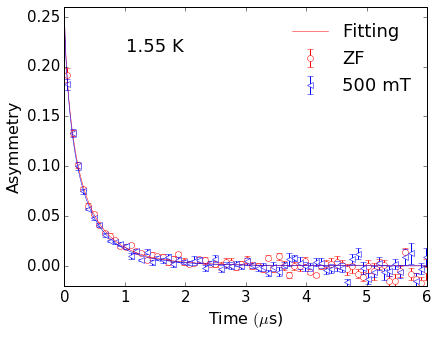

In [23]:
plt.figure(figsize=figsz)
fig_label=("ZF","5 mT","50 mT",'500 mT')
tex_pos=np.array([[1,2,3,4,0.5,0.58],[0.09,0.13,0.18,0.23,0.5,0.58]])
markers=("o","<",">","s","d")
mlcolor=("red","blue","black","green","orange")
#####################
###### This block plot colorful...
# for idx, i in enumerate(plotNo):
#     plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color=mlcolor[idx], fmt=markers[idx],markersize='6',mfc='white', mec=mlcolor[idx], zorder=1)
#     if idx==0:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=2,label='Fitting')
#     else:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color=mlcolor[idx],linewidth=2)
######
for idx, i in enumerate(plotNo):
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],
                 mec=mlcolor[idx], ecolor = mlcolor[idx], fmt=markers[idx],markersize='6', mfc='white', zorder=1)
    if idx==0:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color=mlcolor[idx],linewidth=0.5,label='Fitting')
    else:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color=mlcolor[idx],linewidth=0.5) 

plt.text(1.5, 0.22,'1.55 K',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.yscale('log')
plt.xlim(0., 6)
plt.ylim(-0.02, 0.26)

leg = plt.legend(loc='best', numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
leg.get_frame().set_edgecolor('w')


plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

plt.savefig(r'D:\7_Writing\0_my_phd_thesis\Figures\gd_diffuse\gd_musr_1p55k_decoup.pdf', bbox_inches="tight",verbose=True)
plt.show()